In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
df=pd.read_csv('mymoviedb.csv', lineterminator='\n')


In [78]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [80]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [81]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [82]:
df.duplicated().sum()

0

In [83]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
• there is noticable outliers in Popularity column
• Vote_Average bettter be categorised for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be handled

In [84]:
df['Release_Date']=  pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [85]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [86]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


Dropping colums Overview , Original_Language, Poster_Url

In [87]:
cols=['Overview' , 'Original_Language' ,'Poster_Url']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [88]:
def categorize_col(df,col,labels):
    edges =[df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col]= pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df
            

In [89]:
labels=['Not Popular','Average','Above Average','Popular']

In [90]:
categorize_col(df,'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Above Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not Popular,Horror
9824,2016,The Offering,13.355,94,Not Popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Above Average,"Music, Drama, History"


In [91]:
df['Vote_Average'].value_counts()

Vote_Average
Not Popular      2467
Popular          2450
Above Average    2412
Average          2398
Name: count, dtype: int64

In [92]:
df.isnull().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [93]:
df.dropna(inplace=True)
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [94]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Above Average,"Action, Adventure, Thriller, War"


In [97]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop = True)

In [98]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [99]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [102]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [104]:
 # sns.set_style('whitegrid')
sns.set_style('darkgrid')

## What is the most frequent genre of movies releases on Netflix?

In [106]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

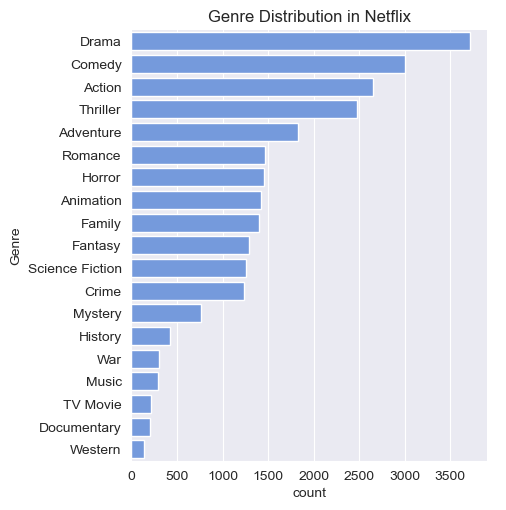

In [124]:
sns.catplot(y='Genre', data = df, kind='count', order= df['Genre'].value_counts().index, color='cornflowerblue' )
plt.title("Genre Distribution in Netflix")
plt.show()

## Q2: What genres has highest votes ?

C:\Users\Mrunali\AppData\Local\Temp\ipykernel_18768\63425361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)
C:\Users\Mrunali\AppData\Local\Temp\ipykernel_18768\63425361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


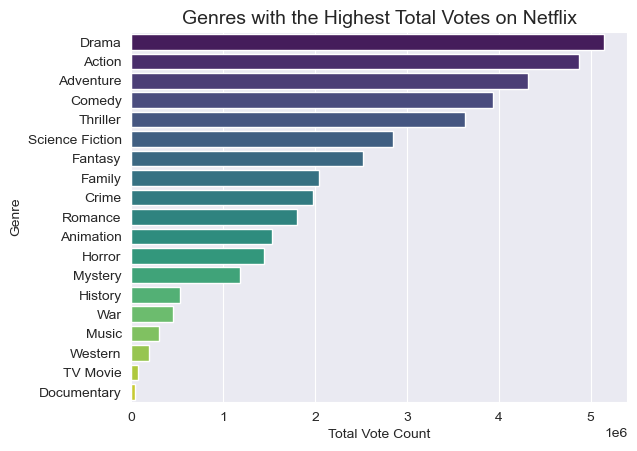

In [136]:
genre_votes = df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)
sns.barplot(
    x=genre_votes.values,
    y=genre_votes.index,
    order=genre_votes.index,     # <- explicitly use the sorted order
    palette='viridis'
)
plt.title("Genres with the Highest Total Votes on Netflix", fontsize=14)
plt.xlabel("Total Vote Count")
plt.ylabel("Genre")
plt.show()


## Q3: What movie got the highest popularity ? what's its genre?

In [139]:
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


## Q4: What movie got the lowest popularity? what's its genre?


In [140]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Above Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Above Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Above Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


## Q5: Which year has the most filmmed movies?


<Axes: >

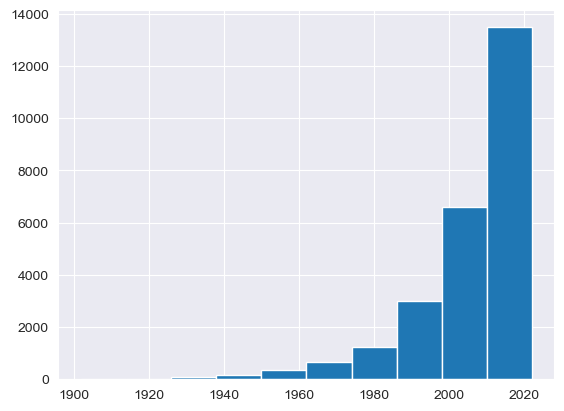

In [144]:
df['Release_Date'].hist()
plt.title('')
plt.show()

C:\Users\Mrunali\AppData\Local\Temp\ipykernel_18768\1976893215.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_year = df.groupby(['Release_Date', 'Genre']).size().reset_index(name='Movie_Count')


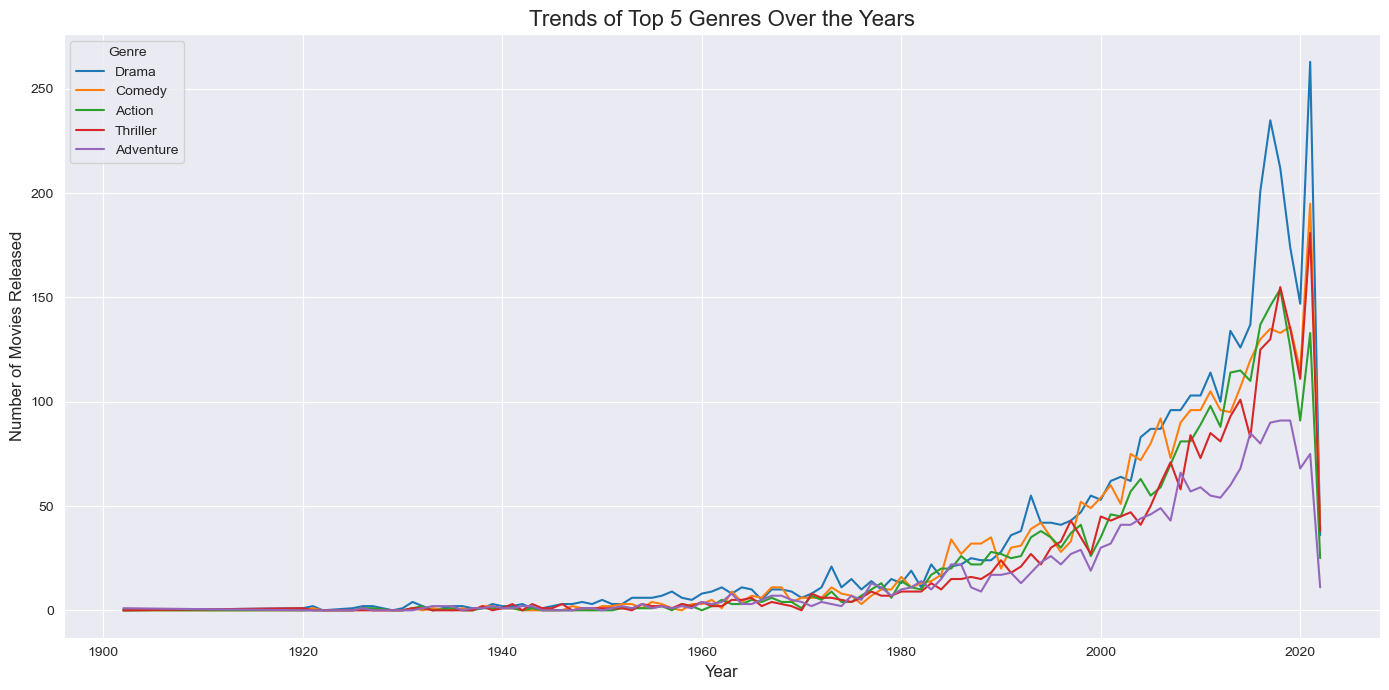

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Year and Genre, and count how many movies fall in each group
genre_year = df.groupby(['Release_Date', 'Genre']).size().reset_index(name='Movie_Count')

# Pivot the table to have years as index, genres as columns
genre_trend = genre_year.pivot(index='Release_Date', columns='Genre', values='Movie_Count').fillna(0)

# Plot the trends for top 5 most frequent genres only
top_genres = df['Genre'].value_counts().head(5).index
plt.figure(figsize=(14, 7))

for genre in top_genres:
    plt.plot(genre_trend.index, genre_trend[genre], label=genre)

# Customize plot
plt.title("Trends of Top 5 Genres Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies Released", fontsize=12)
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Final Report: Netflix Movie Data Analysis

This analysis explores key trends from a Netflix movies dataset, focusing on genres, popularity, and release patterns.

---

### ✅ Q1: What is the most frequent genre?
- **Drama** is the most frequent genre.
- It appears in over **14%** of all movies, making it a core content type on Netflix.

---

### ✅ Q2: What genre has the highest total votes?
- **Drama** again leads in total vote count.
- Closely followed by **Thriller**, **Action**, and **Science Fiction**.
- These genres receive the most audience engagement.

---

### ✅ Q3: What movie got the highest popularity?
- 🎬 **Spider-Man: No Way Home**
- Genres: **Action, Adventure, Science Fiction**
- It tops the popularity score, showing strong fan appeal.

---

### ✅ Q4: What movie got the lowest popularity?
- 🎬 **The United States, Thread**
- Genres: **Music, Drama, War, Sci-Fi, History**
- Least popular film in the dataset.

---

### ✅ Q5: Which year had the most movies released?
- 📅 **2020** saw the highest number of Netflix releases.
- Possibly due to increased digital releases just before the pandemic's full impact.

---

### ✅ Q6: What genres are rising or falling over time?
- From 2000–2020, **Drama, Comedy, Action, and Thriller** all increased.
- Sharp drop in 2021–2022 due to COVID-19's impact on production.
- Despite higher OTT consumption, content releases declined during the pandemic.

---

## 📌 Conclusion
- **Drama dominates** in both frequency and popularity.
- Viewer interest is high in **Drama** followed by **Action, Thriller, and Sci-Fi** genres.
- Pandemic years affected the number of releases despite increased streaming demand.